<a href="https://colab.research.google.com/github/yuiabjip0/Investment-Analysis/blob/main/NLP_1_Text_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaining Early Insights from Textual Data

# Exploratory Data Analysis


# Introducing the Dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# suppress warnings
import warnings;
warnings.filterwarnings('ignore');

# common imports
import pandas as pd
import numpy as np
import math
import re
import glob
import os
import sys
import json
import random
import pprint as pp
import textwrap
import sqlite3
import logging

import spacy
import nltk

from tqdm.auto import tqdm
# register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# pandas display options
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options
pd.options.display.max_columns = 30 # default 20
pd.options.display.max_rows = 60 # default 60
pd.options.display.float_format = '{:.2f}'.format
# pd.options.display.precision = 2
pd.options.display.max_colwidth = 200 # default 50; -1 = all
# otherwise text between $ signs will be interpreted as formula and printed in italic
pd.set_option('display.html.use_mathjax', False)

# np.set_printoptions(edgeitems=3) # default 3

import matplotlib
from matplotlib import pyplot as plt

plot_params = {'figure.figsize': (8, 4),
               'axes.labelsize': 'large',
               'axes.titlesize': 'large',
               'xtick.labelsize': 'large',
               'ytick.labelsize':'large',
               'figure.dpi': 100}
# adjust matplotlib defaults
matplotlib.rcParams.update(plot_params)

import seaborn as sns
sns.set_style("darkgrid")


In [3]:
## your comments
BASE_DIR = '/content/drive/MyDrive/natrual language processing/session 1/data'  ## your path directory to the data folder here ##
os.chdir(BASE_DIR)

# 从左边的栏里找到drive --> NLP --> data的folder

In [5]:
## data的file
pd.options.display.max_colwidth = 150 ###
file = '/content/drive/MyDrive/natrual language processing/session 1/data/un-general-debates-blueprint.csv.gz'## your file path ##
df = pd.read_csv(file)
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


# Getting an Overview of the Data with Pandas


In [6]:
df = pd.read_csv('/content/drive/MyDrive/natrual language processing/session 1/data/un-general-debates-blueprint.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


## Calculating Summary Statistics for Columns


In [7]:
## your comments
df['length'] = df['text'].str.len() ## your code here ##

df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


In [8]:
## your code here ##
df[['country', 'speaker']].describe(include=['object']).T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


In [9]:
## your comments
## your code here ##
#df.groupby('country')['speaker'].count()

df[['country','speaker']].groupby('country').count()

,speaker
country,
AFG,45
AGO,38
ALB,46
AND,22
ARE,44
...,...
YEM,45
YUG,37
ZAF,26


## Checking for Missing Data


In [10]:
## your comments
## your code here ##
df.isnull().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [11]:
## fill missing value with 'speaker', and 'position' with 'unknown'
df['speaker'].fillna('unknown', inplace=True)

In [12]:
## count the speakers containing the word 'Bush'

boolll = df['speaker'].str.contains('Bush')     # make them into a boolan (True / False)
df[boolll]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

## Plotting Value Distributions


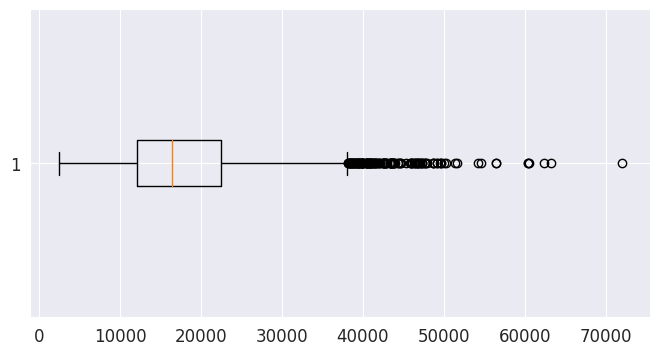

In [13]:
## your comments
## your code here ##
plt.boxplot(df['length'], vert = False)
plt.show()


<Axes: >

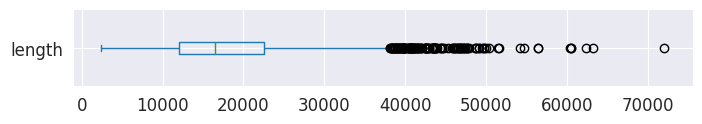

In [14]:
# another method:
df['length'].plot(kind='box',figsize = (8,1),vert = False)

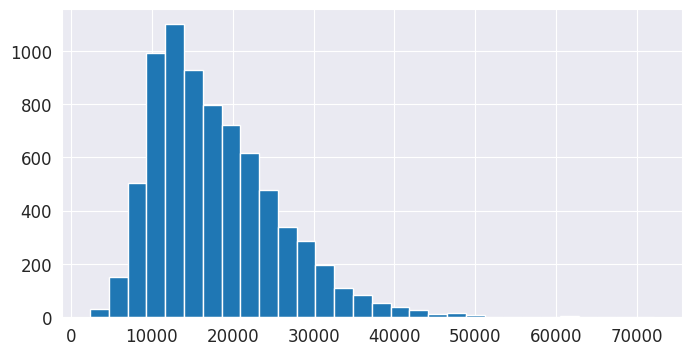

In [15]:
## your comments
## your code here (30 bins) ##
plt.hist(df['length'], bins = 30)
plt.show()

<Axes: ylabel='Frequency'>

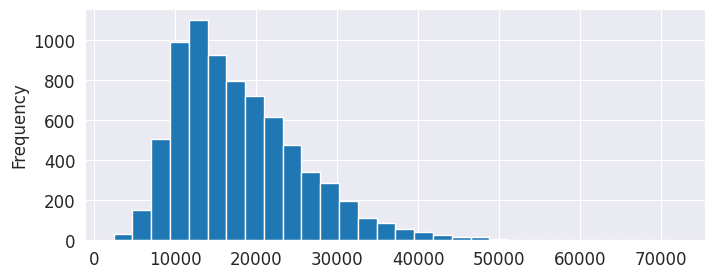

In [16]:
# another method:
df['length'].plot(kind = 'hist', bins = 30, figsize = (8,3))

<Axes: >

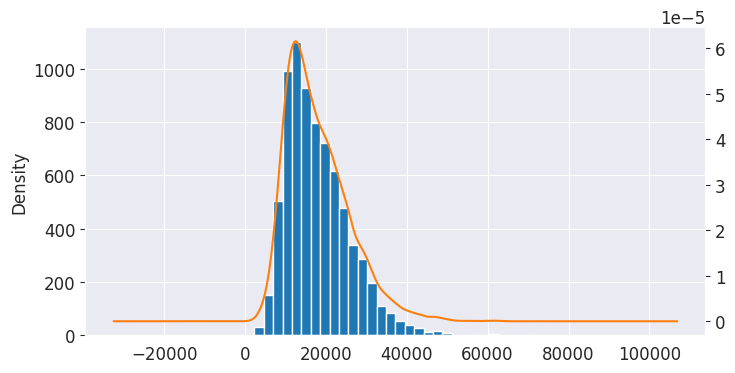

In [17]:
## your comments
## your code here (30 bins) ##
ax = df['length'].plot.hist(bins = 30)
df['length'].plot.kde(ax=ax, secondary_y=True)

<Axes: xlabel='length', ylabel='Count'>

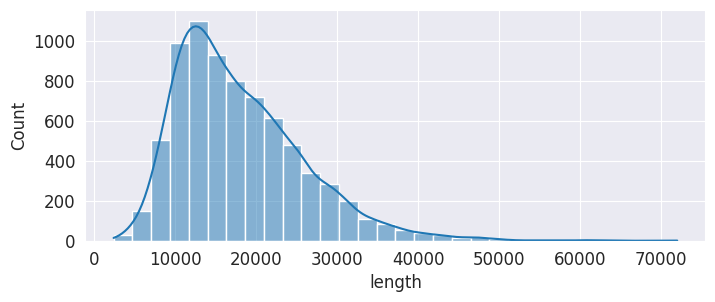

In [18]:
plt.figure(figsize = (8,3))
sns.histplot(data = df, x = 'length', bins = 30, kde = True)

## Comparing Value Distributions across Categories


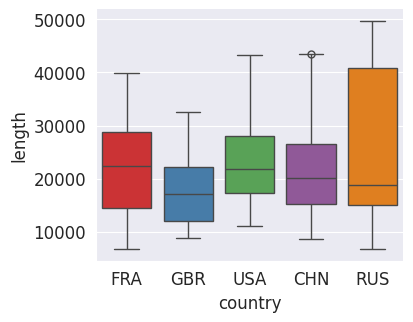

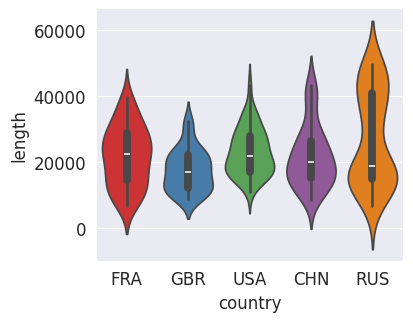

In [19]:
## your comments
where = df['country'].isin(['FRA','GBR','USA','CHN','RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box', palette = 'Set1')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[where], x="country", y="length", kind='violin',palette = 'Set1')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###

In [20]:
df[where].groupby(by = 'country')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
CHN,45.00,21917.20,9373.42,8609.00,15298.00,20089.00,26575.00,43499.00
FRA,46.00,21858.24,9029.71,6714.00,14530.25,22454.50,28855.25,39887.00
GBR,46.00,17672.76,6333.21,8833.00,12121.50,17070.50,22160.75,32495.00
RUS,45.00,27100.18,14082.04,6804.00,15090.00,18873.00,40922.00,49700.00
USA,46.00,23190.39,7017.58,11105.00,17223.50,21918.50,28029.50,43287.00


In [21]:
df.loc[where, ['country','length']].groupby('country').describe()

length                                                               
         count     mean      std      min      25%      50%      75%      max
country                                                                      
CHN      45.00 21917.20  9373.42  8609.00 15298.00 20089.00 26575.00 43499.00
FRA      46.00 21858.24  9029.71  6714.00 14530.25 22454.50 28855.25 39887.00
GBR      46.00 17672.76  6333.21  8833.00 12121.50 17070.50 22160.75 32495.00
RUS      45.00 27100.18 14082.04  6804.00 15090.00 18873.00 40922.00 49700.00
USA      46.00 23190.39  7017.58 11105.00 17223.50 21918.50 28029.50 43287.00

## Visualizing Developments over Time


<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

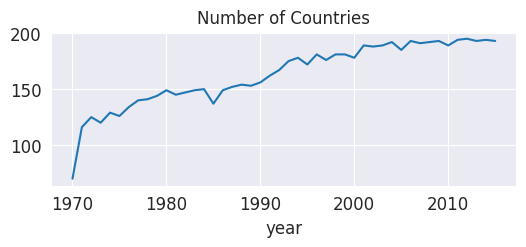

In [22]:
## group by year
df.groupby(by = 'year')['country'].count().plot(kind = 'line', title="Number of Countries", figsize=(6,2))

<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

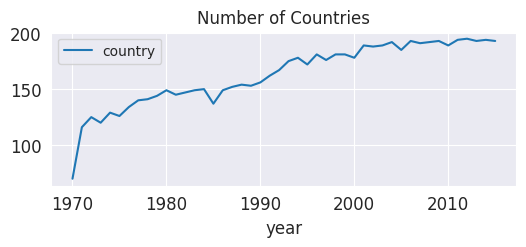

In [23]:
df[['country', 'year']].groupby(by = 'year').count().plot(title="Number of Countries", figsize=(6,2))

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

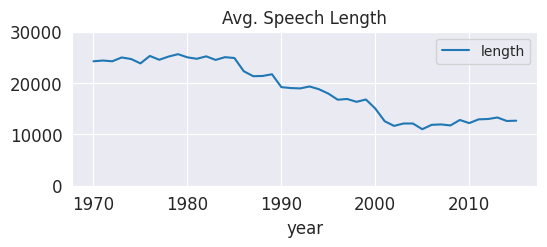

In [24]:
## group by year then aggregate with the mean
df[['length', 'year']].groupby(by = 'year').mean().plot(title="Avg. Speech Length", ylim=(0,30000), figsize=(6,2))

# Building a Simple Text Preprocessing Pipeline


## Tokenization with Regular Expressions


In [25]:
## your comments ##
import regex as re
'''Comment what the functions accomplishes '''
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [26]:
text = "Let's defeat SARS-CoV-2 together in 2020X!"
tokens = tokenize(text)
print('|'.join(tokens))

Let|s|defeat|SARS-CoV-2|together|in|2020X


## Treating Stop Words


In [27]:
## your comments ##
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
## your comments ##
stopwords = set(nltk.corpus.stopwords.words('english'))

In [29]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [30]:
## your comments ##
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

## Processing a Pipeline with one Line of Code


In [31]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):

  ''' pipeline is a list (or any iterable) of functions that are applied sequentially to the text. '''

  tokens = text
  for transform in pipeline:
      tokens = transform(tokens)
  return tokens

In [32]:
## for each row of the token,
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [33]:
## count number of tokens
## should be length, because the token is the list, so we use len()
df['num_tokens'] = df['tokens'].progress_map(len)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [34]:
df.head(3)

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth sessi...,51419,"[may, first, convey, president, congratulations, albanian, delegation, election, presidency, twenty-fifth, session, general, assembly, taking, wor...",4125
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,"177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, a...",29286,"[fortunate, coincidence, precisely, time, united, nations, celebrating, first, twenty-five, years, existence, eminent, jurist, closely, linked, or...",2327
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,"100.\t It is a pleasure for me to extend to you, Mr. President, the warmest congratulations of the Australia Government and its delegation to thi...",31839,"[pleasure, extend, mr, president, warmest, congratulations, australia, government, delegation, general, assembly, election, presidency, distinguis...",2545


# Word Frequency Analysis


## Counting Words with a Counter


In [35]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [36]:
# include more tokens
more_tokens = tokenize("She likes dogs and cats.")
counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [42]:
## your comments
## your code here ##

counter = Counter()

_ = df['tokens'].map(counter.update)

In [43]:
## your comments
pp.pprint(counter.most_common(5))

[('nations', 124508),
 ('united', 120763),
 ('international', 117223),
 ('world', 89421),
 ('countries', 85734)]


In [44]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):

  ''' Comment on what the function accomplishes'''

  # process tokens and update counter
  def update(doc):
      tokens = doc if preprocess is None else preprocess(doc)
      counter.update(tokens)

  # create counter and run through all data
  counter = Counter()
  df[column].progress_map(update)

  # transform counter into data frame
  freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
  freq_df = freq_df.query('freq >= @min_freq')
  freq_df.index.name = 'token'

  return freq_df.sort_values('freq', ascending=False)

In [45]:
freq_df = count_words(df)
freq_df.head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [46]:
## top words with 10+ characters
count_words(df, column='text',
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177


## Creating a Frequency Diagram


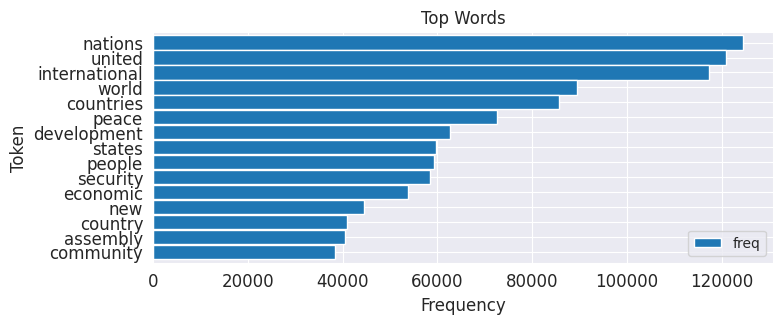

In [49]:
ax = freq_df.head(15).plot(kind = "barh", width=0.95, figsize=(8,3))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words');

## Creating Word Clouds


In [50]:
## select only the text for year 2015 for the USA
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = ## your code here ##

plt.figure(figsize=(4, 2)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

SyntaxError: invalid syntax (<ipython-input-50-98c9c9bc2f85>, line 6)

In [51]:
from wordcloud import WordCloud ###
from collections import Counter ###

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

  ''' What does this function accomplish ? '''

  wc = WordCloud(width=800, height=400,
                  background_color= "black", colormap="Paired",
                  max_font_size=150, max_words=max_words)

  # convert data frame into dict
  if type(word_freq) == pd.Series:
      counter = Counter(word_freq.fillna(0).to_dict())
  else:
      counter = word_freq

  # filter stop words in frequency counter
  if stopwords is not None:
      counter = {token:freq for (token, freq) in counter.items()
                            if token not in stopwords}
  wc.generate_from_frequencies(counter)

  plt.title(title)

  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")

  0%|          | 0/193 [00:00<?, ?it/s]

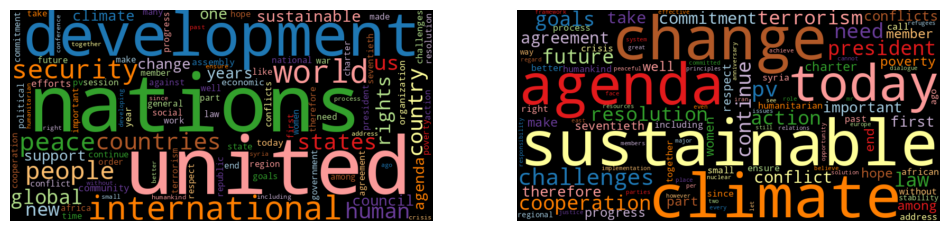

In [52]:
## your comments ##
## use the word counts for the year 2015 ##

freq_2015_df = count_words(df[df['year'] == 2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###

## Ranking with TF-IDF


In [53]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

  ''' What does this function accomplish ? '''

  def update(doc):
      tokens = doc if preprocess is None else preprocess(doc)
      counter.update(set(tokens))

  # count tokens
  counter = Counter()
  df[column].progress_map(update)

  # create data frame and compute idf
  idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
  idf_df = idf_df.query('df >= @min_df')
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
  idf_df.index.name = 'token'
  return idf_df

In [55]:
idf_df = compute_idf(df)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [ ]:
## print a random sample of 5 instances random_state = 42 ##
## your code here  ##

,df,idf
token,,
schools,418,2.99
wastefulness,10,6.72
c6rdova,2,8.33
important,6132,0.30
inconclusively,4,7.64


In [ ]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

In [ ]:
freq_df = freq_df.join(idf_df)
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']

In [ ]:
## check ##

,freq,tfidf,df,idf
token,,,,
nations,124508,12649.99,7495.00,0.10
united,120763,12285.61,7494.00,0.10
international,117223,12364.28,7466.00,0.11


  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

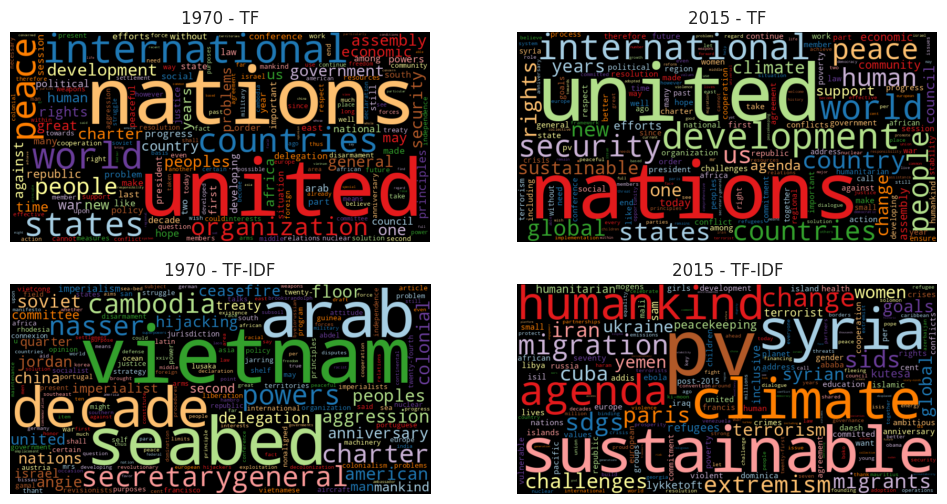

In [56]:
freq_1970 = count_words(df[df['year'] == 1970])
freq_2015 = count_words(df[df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

plt.figure(figsize=(12,6)) ###
#wordcloud(freq_df['freq'], title='All years', subplot=(1,3,1))
plt.subplot(2,2,1)
wordcloud(freq_1970['freq'], title='1970 - TF',
          stopwords=['twenty-fifth', 'twenty-five'])
plt.subplot(2,2,2)
wordcloud(freq_2015['freq'], title='2015 - TF',
          stopwords=['seventieth'])
plt.subplot(2,2,3)
wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF',
          stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])
plt.subplot(2,2,4)
wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF',
          stopwords=['seventieth'])

## *How do you interpret these results ?*

# Finding a Keyword in Context (KWIC)


**Note:** textacy's API had major changes from version 0.10.1 to 0.11.  
Here, `textacy.text_utils.KWIC` became `textacy.extract.kwic.keyword_in_context` (see [textacy documentation](https://textacy.readthedocs.io/en/latest/api_reference/extract.html#module-textacy.extract.kwic)).




In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
try:
  import textacy
except:
  !pip install textacy
  import textacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.4/208.4 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.1 MB/s eta 0:00:00
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=77904 sha256=acac49b36452e5fa5035e61f645318303c73d787f14e8797ba2414ebcebd702d
  Stored in directory: /root/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built jellyfish


In [58]:
import textacy

if textacy.__version__ < '0.11':
    from textacy.text_utils import KWIC

else: # for textacy 0.11.x
    from textacy.extract.kwic import keyword_in_context

    def KWIC(*args, **kwargs):
        # call keyword_in_context with all params except 'print_only'
        return keyword_in_context(*args,
                           **{kw: arg for kw, arg in kwargs.items()
                            if kw != 'print_only'})

ModuleNotFoundError: No module named 'textacy'

In [ ]:
def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True,
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

In [ ]:
random.seed(22) ###
## print keywords in context (KWIC) using doc_series as 2015 text with keyword 'sdgs'

  0%|          | 0/193 [00:00<?, ?it/s]

5 random samples out of 73 contexts for 'sdgs':
 of our planet and its people. The   SDGs   are a tangible manifestation of th
nd, we are expected to achieve the   SDGs   and to demonstrate dramatic develo
ead by example in implementing the   SDGs   in Bangladesh. Attaching due impor
the Sustainable Development Goals (  SDGs  ). We applaud all the Chairs of the
new Sustainable Development Goals (  SDGs  ) aspire to that same vision. The A


# Analyzing N-Grams


In [ ]:
tokens = ["Sustainable", "Development", "Goals"]
print(*[tokens[i:] for i in range(2)])

['Sustainable', 'Development', 'Goals'] ['Development', 'Goals']


In [ ]:
z = zip(['Sustainable', 'Development', 'Goals'],['Development', 'Goals'])
print(*["|".join(i) for i in z])

Sustainable|Development Development|Goals


In [ ]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens, 2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


In [ ]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):

  ''' What does this function accomplish ? '''

  return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

text = "the visible manifestation of the global climate change"
tokens = tokenize(text)

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: visible manifestation|global climate|climate change
Trigrams: global climate change


In [ ]:
## create a columns 'bigrams' in dataframe df by applying
# - function prepare with a pipeline lowering case then tokenizing text
# - function extracting bigrams with stopwords

## your code here

count_words(df, 'bigrams').head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


In [ ]:
## your code here ##

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,bigrams
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth session of the General Assembly?\n34.\tIn taking up the...,51419,"[may, first, convey, president, congratulations, albanian, delegation, election, presidency, twenty-fifth, session, general, assembly, taking, work, agenda, twenty-, fifth, session, general, assem...",4125,"[first convey, albanian delegation, twenty-fifth session, general assembly, twenty- fifth, fifth session, general assembly, twenty-fifth anniversary, united nations, peace-loving member, member st..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,"177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, an eminent jurist so closely linked to our Organiza...",29286,"[fortunate, coincidence, precisely, time, united, nations, celebrating, first, twenty-five, years, existence, eminent, jurist, closely, linked, organization, elected, preside, general, assembly, b...",2327,"[fortunate coincidence, united nations, first twenty-five, twenty-five years, eminent jurist, closely linked, general assembly, argentine government, excellency mr, mr president, felicitous choice..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,"100.\t It is a pleasure for me to extend to you, Mr. President, the warmest congratulations of the Australia Government and its delegation to this General Assembly on your election to the Preside...",31839,"[pleasure, extend, mr, president, warmest, congratulations, australia, government, delegation, general, assembly, election, presidency, distinguished, part, played, service, country, development, ...",2545,"[mr president, warmest congratulations, australia government, general assembly, distinguished part, organization notably, authoritative study, charter makes, admirable choice, australian delegatio..."


In [ ]:
idf_df = compute_idf(df) ### re-initialize to be safe
# concatenate existing IDF data frame with bigram IDFs - use min_df=10

idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)])

freq_df = count_words(df[df['year'] == 2015], 'bigrams')
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

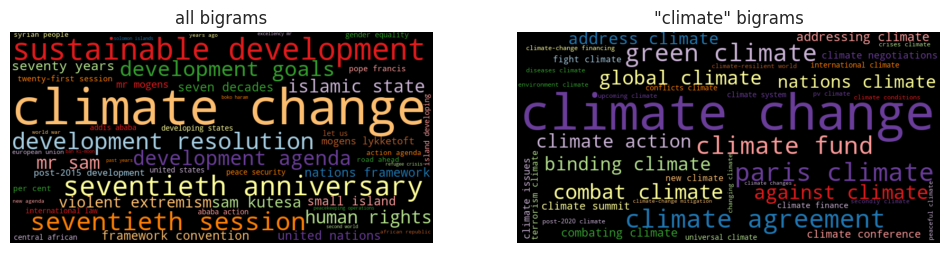

In [ ]:
plt.figure(figsize=(12,6)) ###
plt.subplot(1,2,1) ###
wordcloud(freq_df['tfidf'], title='all bigrams', max_words=50)

plt.subplot(1,2,2) ###
# plt.tight_layout() ###
where = freq_df.index.str.contains('climate')
wordcloud(freq_df[where]['freq'], title='"climate" bigrams', max_words=50)

# Comparing Frequencies across Time-Intervals and Categories


## Creating Frequency Timelines


In [ ]:
def count_keywords(tokens, keywords):

  ''' What does this function accomplish ?'''

  tokens = [t for t in tokens if t in keywords]
  counter = Counter(tokens)
  return [counter.get(k, 0) for k in keywords]

In [ ]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

count_keywords(tokens, keywords)

[1, 0, 3, 2]

In [ ]:
def count_keywords_by(df, by, keywords, column='tokens'):

  ''' What does this function accomplish ?'''


  df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
  freq_matrix = df[column].progress_apply(count_keywords, keywords=keywords)
  freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
  freq_df[by] = df[by] # copy the grouping column(s)

  return freq_df.groupby(by=by).sum().sort_values(by)

In [ ]:
## count frequency by year of the above keywords ##

  0%|          | 0/7507 [00:00<?, ?it/s]

In [ ]:
freq_df

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316
1975,578,20,53,232
1976,451,146,57,347
1977,675,75,58,321
1978,550,82,52,309


In [ ]:
pd.options.display.max_rows = 4

In [ ]:
pd.options.display.max_rows = 60

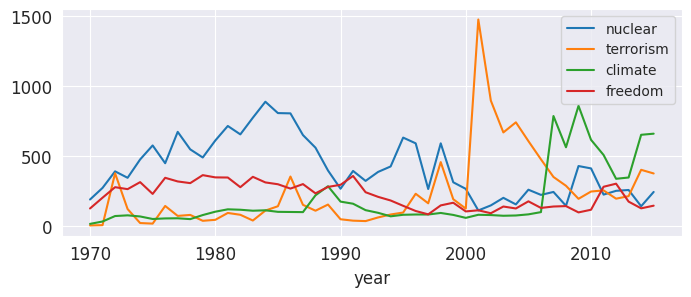

In [ ]:
## plot frequency by keywords over the years

In [ ]:
random.seed(23) ###
# analyzing mentions of 'climate' before 1980
kwic(df.query('year < 1980')['text'], 'climate', window=35, print_samples=5)

  0%|          | 0/1245 [00:00<?, ?it/s]

5 random samples out of 581 contexts for 'climate':
ation with a view to replacing the   climate   of fear, mistrust and hatred by to
ntributing to the maintenance of a   climate   of peace, harmony and understandin
ges in the international political   climate  . There is increasing awareness of 
rian-Israeli front, have created a   climate   which favors the continuation of n
 that, far from noting a promising   climate   in the most critical areas of inte


## Creating Frequency Heat Maps


  0%|          | 0/7507 [00:00<?, ?it/s]

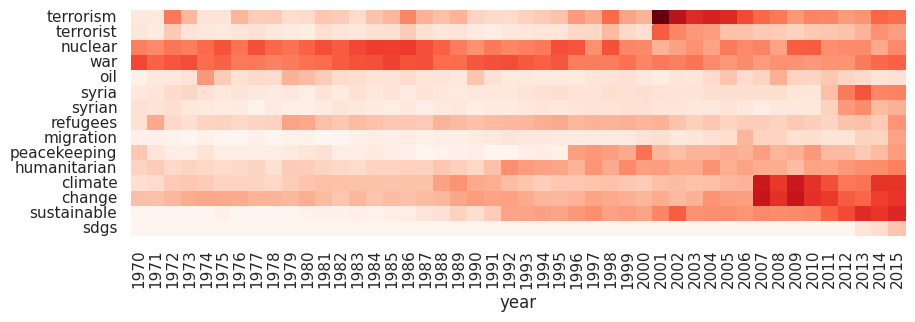

In [ ]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping',
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']

freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(10, 3)) ###
sns.set(font_scale=1) ###
sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1) ###